In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [3]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [4]:
# Preprocess the data (these are NumPy arrays)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train_2 = x_train[:-10000]
y_train_2 = y_train[:-10000]

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x_train_2, y_train_2,  batch_size=32)

validation_generator = train_datagen.flow(x_val, y_val, batch_size=32)

In [7]:
#instantiate the model
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [8]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=len(x_train_2) / 32,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=len(x_val) / 32)

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
1250/1250 [==============================] - 60s 47ms/step - loss: 2.2191 - accuracy: 0.1608 - val_loss: 1.9783 - val_accuracy: 0.2495
Epoch 2/30
1250/1250 [==============================] - 57s 46ms/step - loss: 1.9848 - accuracy: 0.2476 - val_loss: 1.8884 - val_accuracy: 0.2991
Epoch 3/30
1250/1250 [==============================] - 57s 46ms/step - loss: 1.9031 - accuracy: 0.2924 - val_loss: 1.8223 - val_accuracy: 0.3309
Epoch 4/30
1250/1250 [==============================] - 57s 46ms/step - loss: 1.8450 - accuracy: 0.3147 - val_loss: 1.7817 - val_accuracy: 0.3532
Epoch 5/30
1250/1250 [==============================] - 57s 45ms/step - loss: 1.8082 - accuracy: 0.3279 - val_loss: 1.7613 - val_accuracy: 0.3539
Epoch 6/30
1250/1250 [==============================] - 57s 46ms/step - loss: 1.7732 - accuracy: 0.3500 - val_loss: 1.7447 - val_accuracy: 0.3681
Epoch 7/30
1250/1250 [==============================] - 56s 45ms/step - loss: 1.7454 - accuracy: 0.3516 - val_loss: 1.7007 -

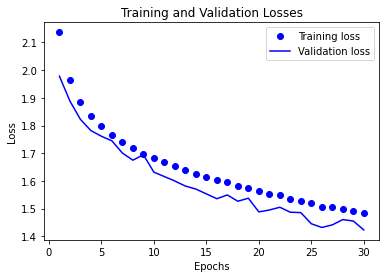

<Figure size 432x288 with 0 Axes>

In [10]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.savefig('results/6_2b_lossplot.png')

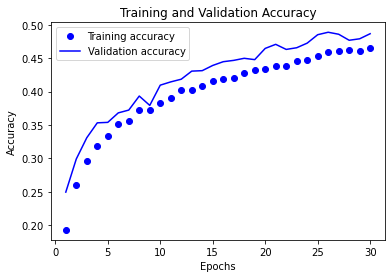

<Figure size 432x288 with 0 Axes>

In [11]:
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
plt.savefig('results/6_2b_accplot.png')

In [12]:
#retrain the model and evaluate on test
train_generator = train_datagen.flow(x_train, y_train,  batch_size=32)

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

#16 epochs chosen based on graphs above
history = model.fit_generator(train_generator,
                             steps_per_epoch=len(x_train) / 32,
                             epochs=16)
results = model.evaluate(x_test, y_test)

Epoch 1/16
1562/1562 [==============================] - 45s 28ms/step - loss: 1.4796 - accuracy: 0.4732
Epoch 2/16
1562/1562 [==============================] - 44s 28ms/step - loss: 1.4757 - accuracy: 0.4711
Epoch 3/16
1562/1562 [==============================] - 44s 28ms/step - loss: 1.4645 - accuracy: 0.4736
Epoch 4/16
1562/1562 [==============================] - 45s 29ms/step - loss: 1.4569 - accuracy: 0.4789
Epoch 5/16
1562/1562 [==============================] - 45s 29ms/step - loss: 1.4530 - accuracy: 0.4769
Epoch 6/16
1562/1562 [==============================] - 44s 28ms/step - loss: 1.4429 - accuracy: 0.4845
Epoch 7/16
1562/1562 [==============================] - 44s 28ms/step - loss: 1.4279 - accuracy: 0.4880
Epoch 8/16
1562/1562 [==============================] - 45s 29ms/step - loss: 1.4317 - accuracy: 0.48920s - loss: 1.4317 - 
Epoch 9/16
1562/1562 [==============================] - 44s 28ms/step - loss: 1.4220 - accuracy: 0.4914
Epoch 10/16
1562/1562 [=====================

In [13]:
model.save('results/6_2b_model.h5')

In [14]:
prediction_results = model.predict(x_test)

In [15]:
#write metrics to file
with open('results/6_2b_metrics.txt', 'w') as f:
    f.write('Training Loss: {}'.format(str(history.history['loss'])))
    f.write('\nTraining Accuracy: {}'.format(str(history.history['accuracy'])))
    f.write('\nTest Loss: {}'.format(results[0]))
    f.write('\nTest Accuracy: {}'.format(results[1]))

In [16]:
predictions = pd.DataFrame(prediction_results, columns=['0','1','2','3','4','5','6','7','8','9'])
predictions.to_csv('results/6_2b_predictions.csv', index=False)